# ML Model training and evaluation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import preprocessors as pp
# import pipeline as pipe

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix

import config

In [2]:
train_df = pd.read_csv(config.TRAIN_DATA_PATH)
test_df = pd.read_csv(config.TEST_DATA_PATH)

In [3]:
X_train, y_train = train_df.drop(config.TARGET,axis=1), train_df[config.TARGET]
X_test, y_test = test_df.drop(config.TARGET,axis=1), test_df[config.TARGET]

In [4]:
# X_train.head()

### Building Pipeline

In [5]:
pipe = Pipeline([
    ('drop',pp.FeaturesToDrop(config.DROP_COLS)),
    ('ohe',pp.OneHotCatEncoder(cols=config.BINARY_CAT_VARIABLES,drop='if_binary')),
    ('rare',pp.RareLabelCatEncoder(cols=config.MULTI_CAT_VARIABLES)),
    ('freq',pp.FrequencyCatEncoder(cols=config.MULTI_CAT_VARIABLES)),
    ('pca',pp.PCATransformer(cols=config.NUM_COLS,n_components=0.8)),
    ('scaler',MinMaxScaler((0, 100))),
    ('clf',GradientBoostingClassifier())
])

In [6]:
pipe.fit(X_train,y_train)

/home/db/anaconda3/envs/fop/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/db/anaconda3/envs/fop/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


Pipeline(steps=[('drop', FeaturesToDrop()), ('ohe', OneHotCatEncoder()),
                ('rare', RareLabelCatEncoder()),
                ('freq', FrequencyCatEncoder()), ('pca', PCATransformer()),
                ('scaler', MinMaxScaler(feature_range=(0, 100))),
                ('clf', GradientBoostingClassifier())])

In [7]:
pipe.predict(X_test.sample(5,random_state=1))

array([1, 0, 0, 0, 1])

In [8]:
y_test.sample(5,random_state=1).reset_index(drop=True)

,Opioid.Prescriber
0,1
1,0
2,0
3,0
4,1


In [9]:
y_test.sample(5,random_state=1).values.reshape(-1,)

array([1, 0, 0, 0, 1])

### Model selection and evaluation

In [10]:
y_pred = pipe.predict(X_test)

In [11]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      2083
           1       0.94      0.86      0.90      2917

    accuracy                           0.89      5000
   macro avg       0.88      0.89      0.88      5000
weighted avg       0.89      0.89      0.89      5000



In [12]:
roc_auc_score(y_test,y_pred)

0.8906643575142059

In [13]:
confusion_matrix(y_test,y_pred)

array([[1916,  167],
       [ 404, 2513]])

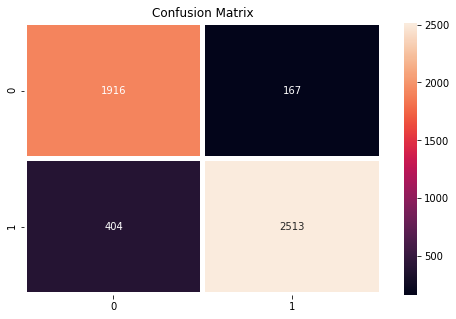

In [14]:
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",linewidths=4);
plt.title("Confusion Matrix")
plt.show()

In [15]:
test = pd.DataFrame({
    'Actual': np.array([1,0,1,1,1]),
    'Pred':np.array([1,0,1,0,1])
})

In [16]:
print(test)

   Actual  Pred
0       1     1
1       0     0
2       1     1
3       1     0
4       1     1
